In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
url = pd.read_csv('urls.csv')
urldata = url.iloc[:,1:]

In [5]:
urldata.head()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,btemailehkcbhsbhc.weebly.com,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1
1,deadspin.com,0,0,1,3,0,0,0,0,0,1,1,1,1,1,1,0
2,cirrilla-stripe-form.web.app,0,0,0,0,0,0,0,1,0,1,1,1,1,1,1,1
3,quotemyproject889887.firebaseapp.com,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1
4,opmklw.com,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1


In [6]:
urldata.shape

(2000, 17)

In [7]:
urls = urldata.sample(frac = 1).reset_index(drop=True) #shuffling the rows in the dataset

In [8]:
urls.head()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,user-info-id.67-223-117-171.cprapid.com,0,0,1,1,0,0,0,1,0,0,0,1,1,1,1,1
1,pornsharing.com,0,0,1,1,0,0,0,0,0,0,1,1,1,1,0,0
2,buzzfil.net,0,0,1,4,0,0,0,0,0,1,1,1,1,1,1,0
3,udn.com,0,0,1,4,0,0,0,0,0,1,1,1,1,1,1,0
4,pagostuyapay.hostfree.pw,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,1


In [9]:
urls.iloc[:,0]

0       user-info-id.67-223-117-171.cprapid.com
1                               pornsharing.com
2                                   buzzfil.net
3                                       udn.com
4                      pagostuyapay.hostfree.pw
                         ...                   
1995                                twitter.com
1996                            extratorrent.cc
1997                                  europa.eu
1998                            distractify.com
1999                            distractify.com
Name: Domain, Length: 2000, dtype: object

In [10]:
urls.to_csv('urls.csv')

In [11]:
X = urls.iloc[:,1:-1].values
y = urls.iloc[:,-1].values

In [12]:
X

array([[0, 0, 1, ..., 1, 1, 1],
       [0, 0, 1, ..., 1, 1, 0],
       [0, 0, 1, ..., 1, 1, 1],
       ...,
       [0, 0, 1, ..., 1, 1, 1],
       [0, 0, 1, ..., 1, 1, 1],
       [0, 0, 1, ..., 1, 1, 0]], dtype=int64)

In [13]:
y

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [16]:
len(y_train)

1340

In [17]:
len(y_test)

660

In [18]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
model = SVC()
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       350
           1       0.99      0.85      0.91       310

    accuracy                           0.92       660
   macro avg       0.93      0.92      0.92       660
weighted avg       0.93      0.92      0.92       660



In [19]:
param_grid = {'C':[0.1,1,10,100],
             'gamma':[1,0.1,0.01,0.001,0.0001],
             'kernel':['rbf']}
grid = GridSearchCV(SVC(),param_grid,cv=5)
grid.fit(X_train,y_train)

print ("Best parameters set found on development set:")
print ()
print (grid.best_params_)

Best parameters set found on development set:

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}


In [20]:
y_true, y_pred = y_test, grid.predict(X_test)
print(classification_report(y_true, y_pred))
print()

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       350
           1       0.95      0.93      0.94       310

    accuracy                           0.95       660
   macro avg       0.95      0.94      0.95       660
weighted avg       0.95      0.95      0.95       660




In [21]:
sv = SVC(C = 1, gamma = 1, kernel = 'rbf')
sv.fit(X_train,y_train)
predictions = sv.predict(X_test)
y_pred = sv.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       350
           1       0.96      0.92      0.94       310

    accuracy                           0.94       660
   macro avg       0.95      0.94      0.94       660
weighted avg       0.94      0.94      0.94       660



In [22]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Recall metric in the testing dataset:  0.9193548387096774


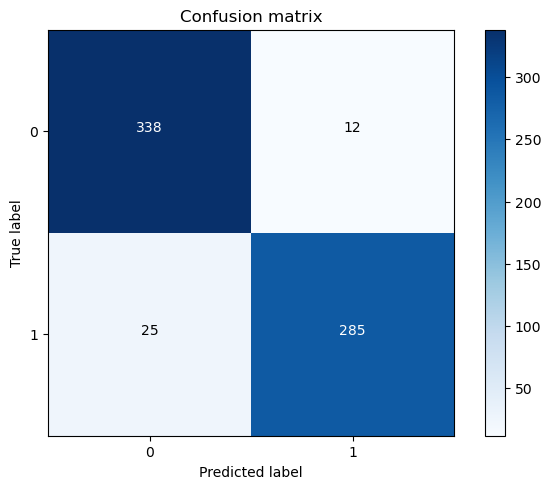

In [23]:
cnf_matrix = confusion_matrix(y_test,y_pred)
np.set_printoptions(precision=2)
print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()